# Importing libraries    

In [1]:
#for data manipulation and analysis
import pandas as pd

#for creating plots and visualizations
import matplotlib.pyplot as plt 

#for creating more complex plots than Matplot
import seaborn as sns 

#for numerical computing
import numpy as np 

# Reading Data

In [3]:
df = pd.read_csv("DataScience_salaries (2020-2024).csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


# Data Cleaning and EDA

In [4]:
#get the dimensions of the dataframe - the number of rows and columns
df.shape

(14838, 11)

In [5]:
#get the information about the Dataframe's columns, their data types, number of non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [6]:
#check for null values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
#Check number of duplicates
df.duplicated(keep="first").sum()

5711

In [8]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
#check the dimension of the dataframe again after data cleaning
df.shape

(9127, 11)

In [10]:
#get descriptive statistics
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,9127.000000,9.127000e+03,9127.000000,9127.000000
mean,2023.144735,1.715814e+05,146752.407363,36.309850
std,0.779968,4.514935e+05,73414.901761,47.386109
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.545150e+04,95000.000000,0.000000
50%,2023.000000,1.400000e+05,138400.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [11]:
#demand for data science positions by year
jobs_count = df.work_year.value_counts()
sorted_jobs_count = jobs_count.sort_values(ascending=True)
sorted_jobs_count

2020      75
2021     216
2022    1113
2024    3091
2023    4632
Name: work_year, dtype: int64

-> There is an uptrend in the demand for data science positions from 2020 to 2024.

In [12]:
#demand for data science positions by level
df.experience_level.value_counts()

SE    5414
MI    2466
EN     893
EX     354
Name: experience_level, dtype: int64

-> Most employees in this sector are mid-seniors and seniors.

In [13]:
#job counts by type of employment
df.employment_type.value_counts()

FT    9061
PT      27
CT      26
FL      13
Name: employment_type, dtype: int64

-> Almost all positions (99.35) within the field of data science necessitate full-time employment.

In [14]:
#count of companies by size
df.company_size.value_counts()

M    8323
L     624
S     180
Name: company_size, dtype: int64

-> The majority of companies offering positions in the field of data science are categorized as medium-sized or larger.

In [15]:
#count of jobs by remote ratio
df.remote_ratio.value_counts()

0      5690
100    3191
50      246
Name: remote_ratio, dtype: int64

-> The majority of companies offer either on-site or remote working arrangments.

In [16]:
#count of jobs by salary currency
df.salary_currency.value_counts().head(5)

USD    8155
GBP     446
EUR     362
INR      53
CAD      50
Name: salary_currency, dtype: int64

-> The majority of jobs arr paid in USD.

In [17]:
max_salary = df.groupby('job_title')['salary_in_usd'].max().reset_index()
sorted_max_salary = max_salary.sort_values(by='salary_in_usd', ascending=False)
sorted_max_salary

,job_title,salary_in_usd
0,AI Architect,800000
45,Data Analyst,774000
11,Analytics Engineer,750000
89,Data Scientist,750000
56,Data Engineer,750000
...,...,...
22,BI Data Engineer,60000
109,Insight Analyst,55368
142,Quantitative Research Analyst,51000
36,CRM Data Analyst,40000


In [18]:
#Count of jobs by title
df.job_title.value_counts().head(10)

Data Engineer                1709
Data Scientist               1684
Data Analyst                 1245
Machine Learning Engineer     867
Analytics Engineer            333
Research Scientist            288
Data Architect                243
Research Engineer             194
Data Science                  162
ML Engineer                   145
Name: job_title, dtype: int64

-> One of the most sought-after roles in data science is filled by data analysts.

In [19]:
#filter a dataframe which only includes rows where the job_title column matches the value "Data Analyst"
job_position = "Data Analyst"
filtered_df = df[df['job_title'] == job_position]

In [20]:
#display the mean salary of data analysts by year
filtered_df.groupby('work_year')['salary_in_usd'].mean()

work_year
2020     60911.166667
2021     78258.500000
2022    105140.041667
2023    108714.460938
2024    110024.800487
Name: salary_in_usd, dtype: float64

-> The average salary of data analysts is rising annually. 

In [21]:
sal_by_ex = filtered_df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
avg_salary_by_exp = sal_by_ex.sort_values(by='salary_in_usd', ascending=True)
avg_salary_by_exp

,experience_level,salary_in_usd
0,EN,85896.714286
2,MI,98171.846395
1,EX,112579.545455
3,SE,123952.126036


-> The average salary for data analysts rises in correlation with their level of experience.

In [22]:
#select columns from the dataframe 'df' - excluding those of type 'object'
num_col = df.select_dtypes(exclude='object')

In [23]:
#summary statistics (min & max) of the numerical columns in the dataframe "num_col"
num_col.describe().loc[["min","max"],:].T

,min,max
work_year,2020.0,2024.0
salary,14000.0,30400000.0
salary_in_usd,15000.0,800000.0
remote_ratio,0.0,100.0


# Data Visualization

In [24]:
avg_data_salary = df.groupby('work_year')['salary_in_usd'].mean()

In [25]:
avg_analyst_salary = filtered_df.groupby('work_year')['salary_in_usd'].mean()

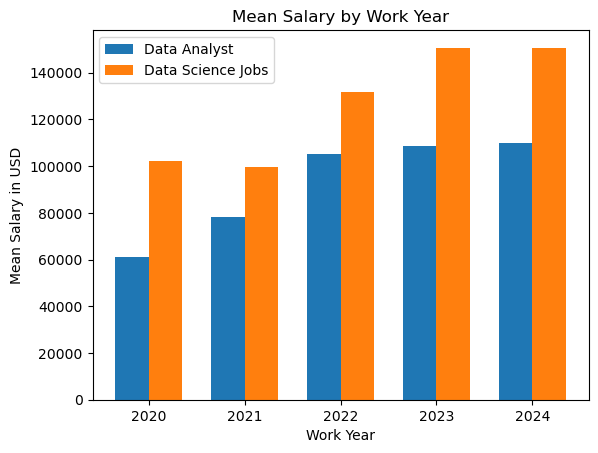

In [26]:
#visually compare the annual mean salary of data analysts with that of the market
x_variables = [str(index) for  index in list(avg_data_salary.index)]
values1 = [int(value) for value in list(avg_analyst_salary.values)]  # Values for the first cluster
values2 = [int(value) for value in list(avg_data_salary.values)]  # Values for the second cluster

# Setting the positions for the bars
x = np.arange(len(x_variables))
width = 0.35  # Width of the bars

# Creating the clustered bar plot
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='Data Analyst')
bars2 = ax.bar(x + width/2, values2, width, label='Data Science Jobs')

# Adding labels and title
ax.set_xlabel('Work Year')
ax.set_ylabel('Mean Salary in USD')
ax.set_title('Mean Salary by Work Year')
ax.set_xticks(x)
ax.set_xticklabels(x_variables)
ax.legend()
ax.set_ylim(bottom=0)

plt.show()

-> This chart illustrates the correlation between the average salary of data analysts and that of the market.

Text(0.5, 1.0, 'Average Salary for Data Analysts by Experience')

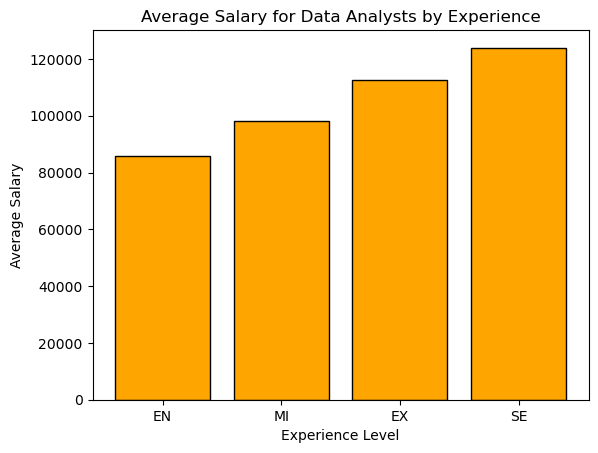

In [27]:
plt.bar(avg_salary_by_exp['experience_level'],avg_salary_by_exp['salary_in_usd'],color='orange',edgecolor='black')

plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.title("Average Salary for Data Analysts by Experience")

-> This chart depicts the relationship between the salary of data analysts and years of experience.

In [28]:
#check if Data Analysts lies within top 10 data science job title
top_jobs_title = df['job_title'].value_counts().head(10)
top_jobs_title

Data Engineer                1709
Data Scientist               1684
Data Analyst                 1245
Machine Learning Engineer     867
Analytics Engineer            333
Research Scientist            288
Data Architect                243
Research Engineer             194
Data Science                  162
ML Engineer                   145
Name: job_title, dtype: int64

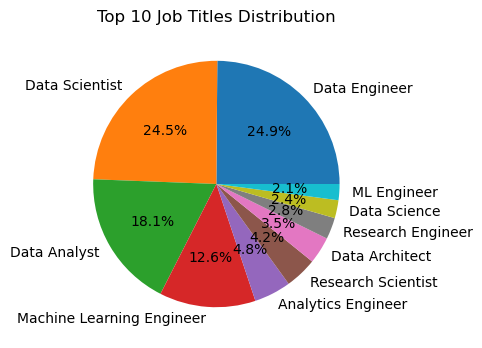

In [29]:
plt.figure(figsize=(4,4))
plt.pie(top_jobs_title, labels=top_jobs_title.index, autopct='%1.1f%%')
plt.title(f'Top 10 Job Titles Distribution')
plt.show()

-> The distribution of data science job titles ranks "Data Analyst" among the top 10.